<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week03_1_instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Exploration Notebook - Instacart

[https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart]()

The dataset for this competition is a relational set of files describing customers' orders over time.

Objective:

The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.

In [5]:
# importing the necessary modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None # default='warn'

%matplotlib inline

* 원래 matplotlib으로 그림을 그리면 plt.show()를 호출해야 그래프가 보이는데, 이걸 쓰면 노트북 셀을 실행할 때 자동으로 그래프가 출력된다.

* 필요 없는 경우: PyCharm, VSCode 같은 IDE에서는 필요 없다. (거긴 그냥 plt.show() 쓰면 됨.)

pd.options.mode.chained_assignment = None # default='warn'
* 코드 중에 슬라이싱된 DataFrame에 바로 값을 넣는 경우, 경고 메시지가 너무 많이 뜰 때 사용한다.

* 주의할 점: 경고를 없앤다고 해서 문제(원본에 반영이 안 됨)가 해결되는 건 아님. 안전하게 하려면 .loc[]을 쓰는 게 정석!

Let us first read all the files as dataframe objects and then look at the top few rows.

In [7]:
order_products_train_df = pd.read_csv("/content/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/order_products__prior.csv")
orders_df = pd.read_csv("/content/orders.csv")
products_df = pd.read_csv("/content/products.csv")
aisles_df = pd.read_csv("/content/aisles.csv")
departments_df = pd.read_csv("/content/departments.csv")

In [3]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


In [5]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


* orders.csv → 주문의 전반적 메타데이터 (누가, 언제, 몇 번째 주문인지).

* order_products_prior.csv → 마지막 주문 이전의 모든 주문 정보.

* order_products_train.csv → 학습용으로 제공된 마지막 주문 정보.

* order_products_test.csv → 예측해야 하는 마지막 주문 정보.

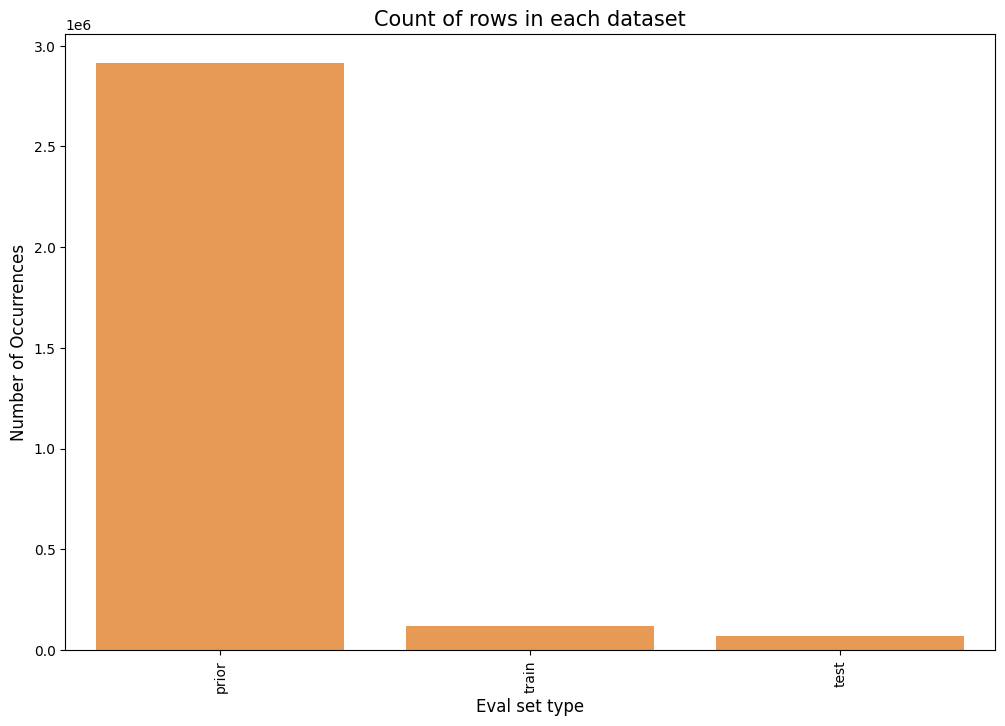

In [11]:
cnt_srs = orders_df.eval_set.value_counts()

# value_counts() -> 시리즈 안에 있는 값들의 **빈도수(개수)**를 세어주는 메서드.

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs=orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,186935
test,68002
train,118932


Now let us validate the claim that 4 to 100 orders of a customer are given.

/tmp/ipython-input-558827441.py:1: FutureWarning: The provided callable <function max at 0x7ac8f7d4ff60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


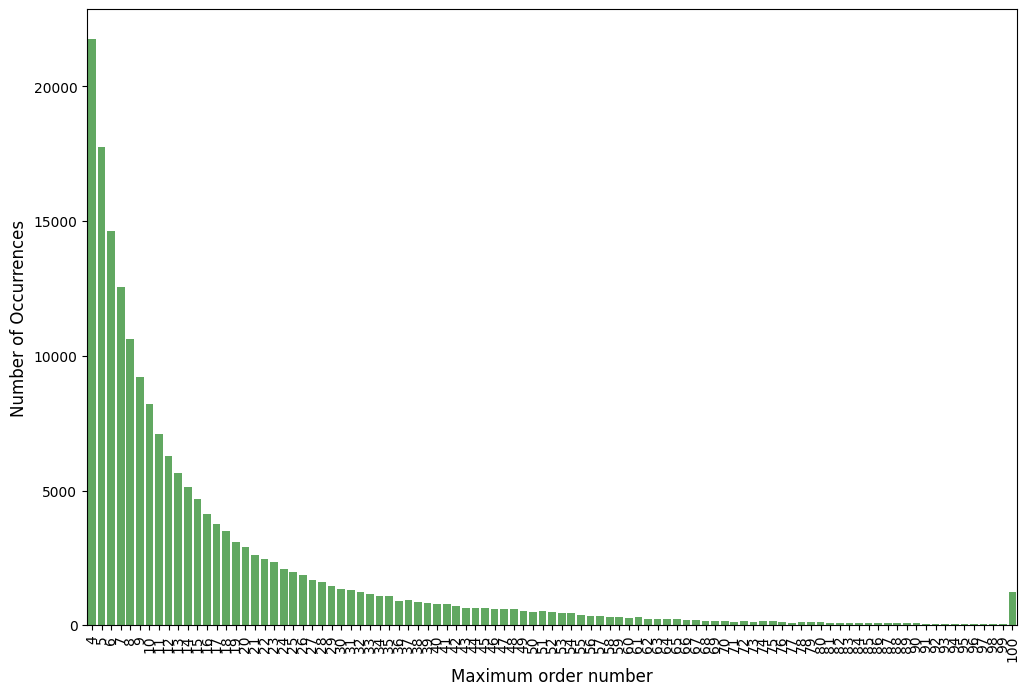

In [13]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So there are no orders less than 4 and is max capped at 100 as given in the data page.

Now let us see how the ordering habit changes with day of week.

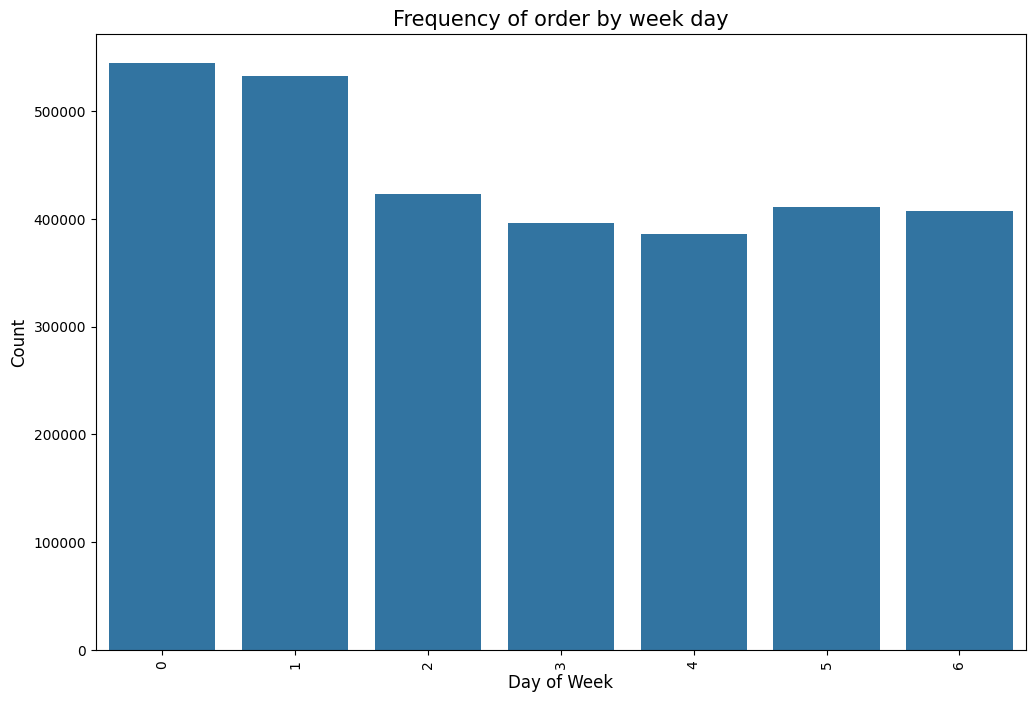

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow",data=orders_df, color=color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Seems like 0 and 1 is Saturday and Sunday when the orders are high and low during Wednesday.

Now we shall see how the distribution is with respect to time of the day.

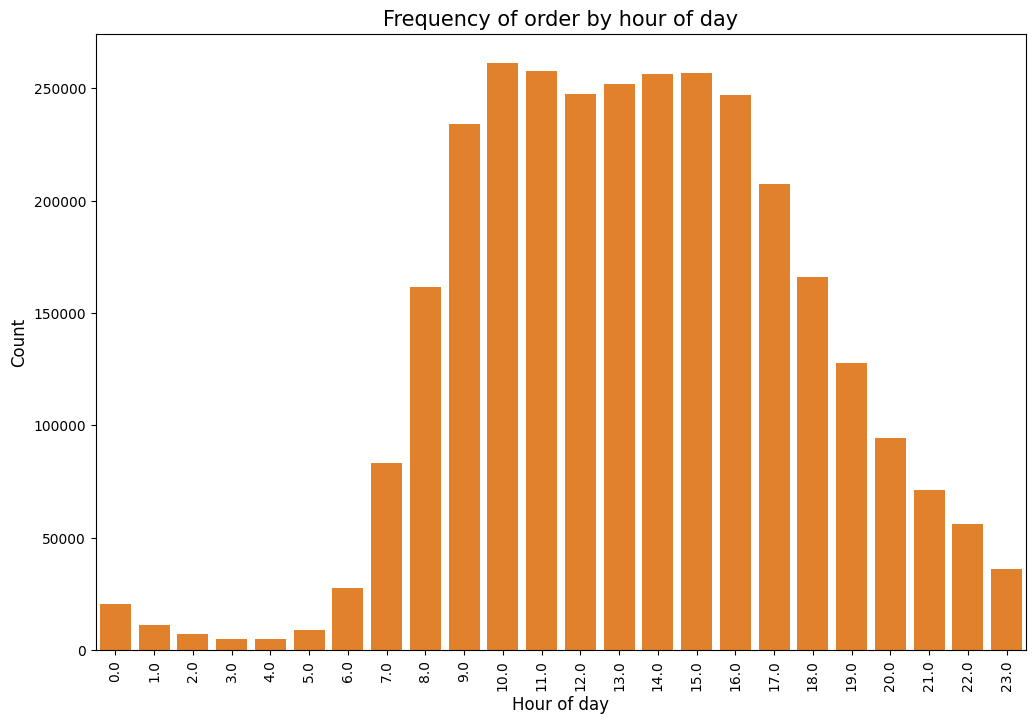

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data=orders_df,color=color[1])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Hour of day',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day",fontsize=15)
plt.show()

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

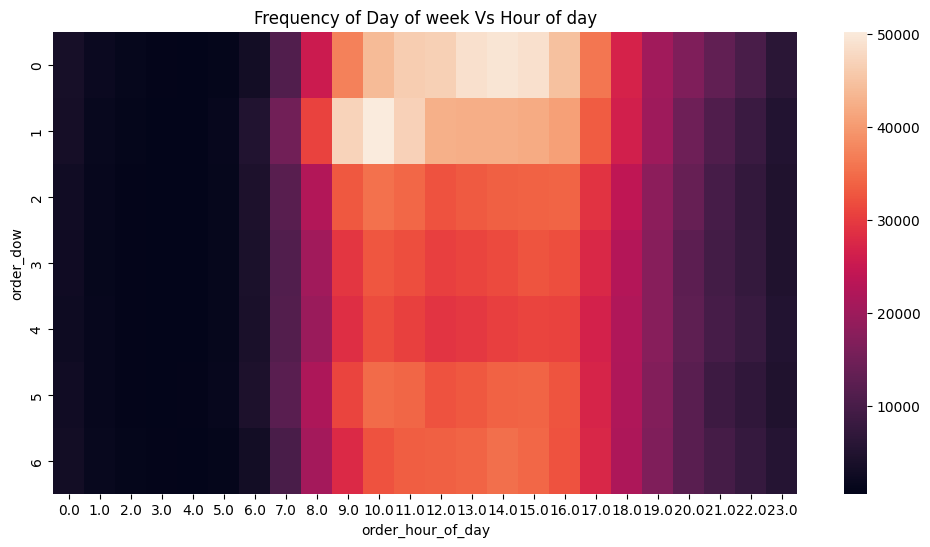

In [17]:
grouped_df = orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index='order_dow',columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

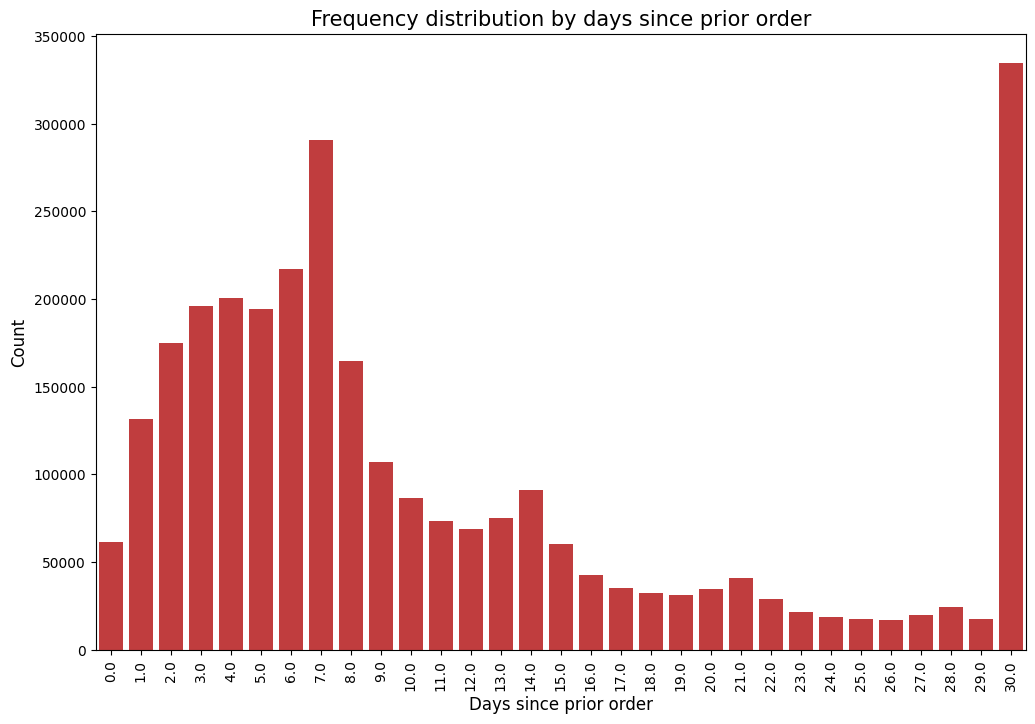

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders_df, color=color[3])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Days since prior order',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order",fontsize =15)
plt.show()

Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).

Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

In [19]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5892116726365044)

In [20]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

np.float64(0.5985944127509629)

On an average, about 59% of the products in an order are re-ordered products.

**No re-ordered products:**

Now that we have seen 59% of the products are re-ordered, there will also be situations when none of the products are re-ordered. Let us check that now.


In [21]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

/tmp/ipython-input-1440773216.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1


,count
reordered,
1.0,0.879183
0.0,0.120817


In [22]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/tmp/ipython-input-1346010774.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1


,count
reordered,
1,0.93444
0,0.06556


Now let us see the number of products bought in each order.

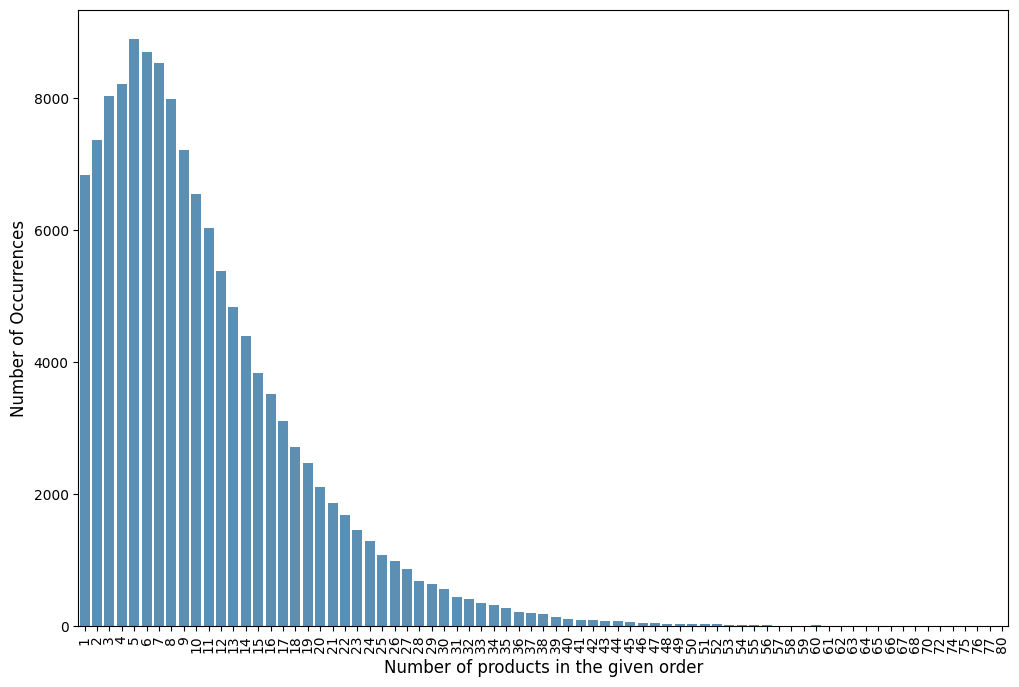

In [23]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Number of products in the given order',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

A right tailed distribution with the maximum value at 5.!

Before we explore the product details, let us look at the other three files as well.

In [24]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [25]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [26]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Now let us merge these product details with the order_prior details.

In [27]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


In [28]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,81309
1,Bag of Organic Bananas,65056
2,Organic Strawberries,45540
3,Organic Baby Spinach,41314
4,Organic Hass Avocado,36599
5,Organic Avocado,30107
6,Large Lemon,26245
7,Strawberries,24547
8,Limes,24087
9,Organic Whole Milk,23554


Now let us look at the important aisles.

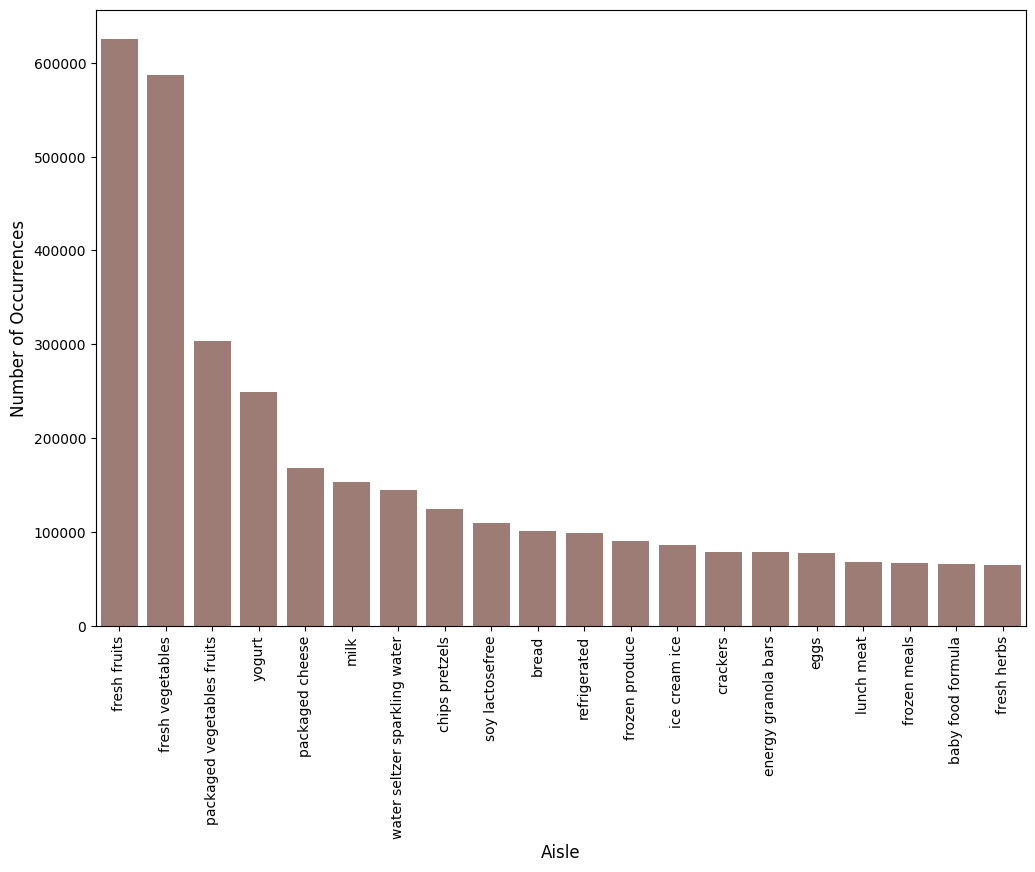

In [29]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Aisle',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Department Distribution:**

Let us now check the department wise distribution.

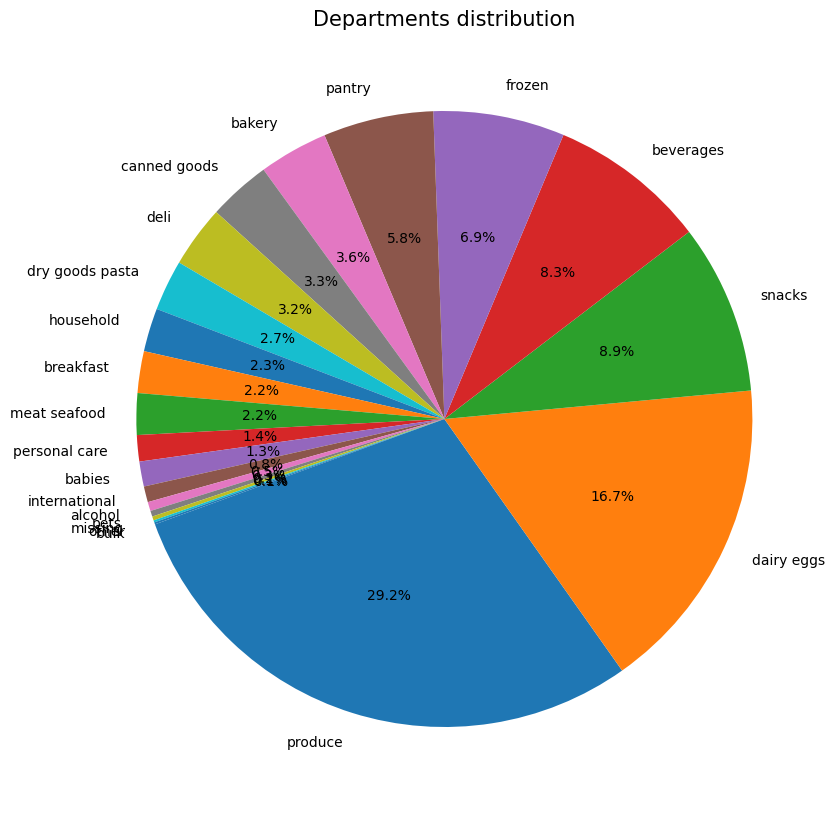

In [30]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce is the largest department. Now let us check the reordered percentage of each department.

**Department wise reorder ratio:**

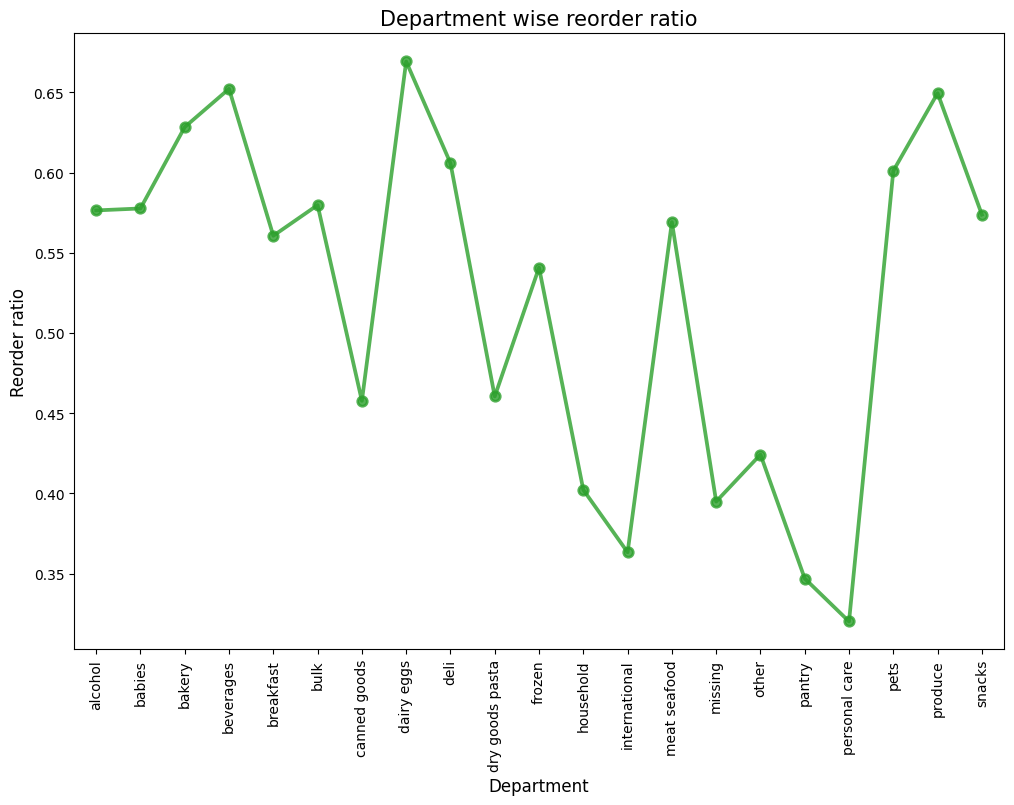

In [31]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**Aisle - Reorder ratio:**

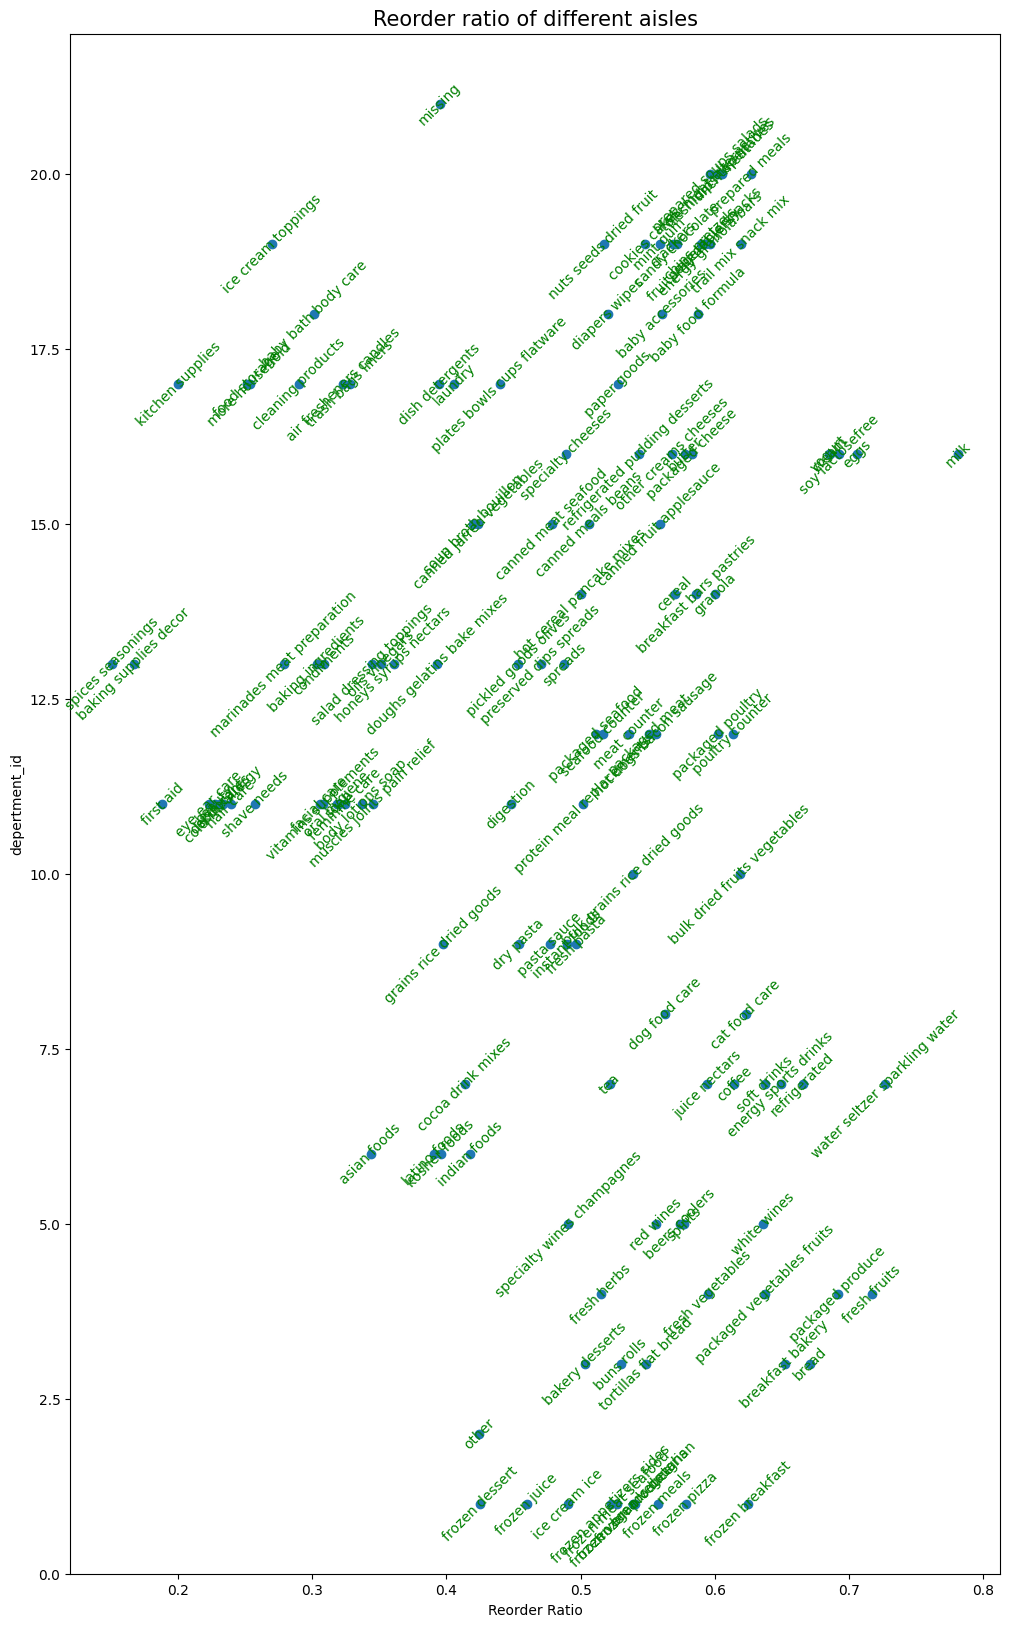

In [33]:
grouped_df = order_products_prior_df.groupby(["department_id","aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('depertment_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()


**Add to Cart - Reorder ratio:**

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

/tmp/ipython-input-2317599065.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]> 70] = 70


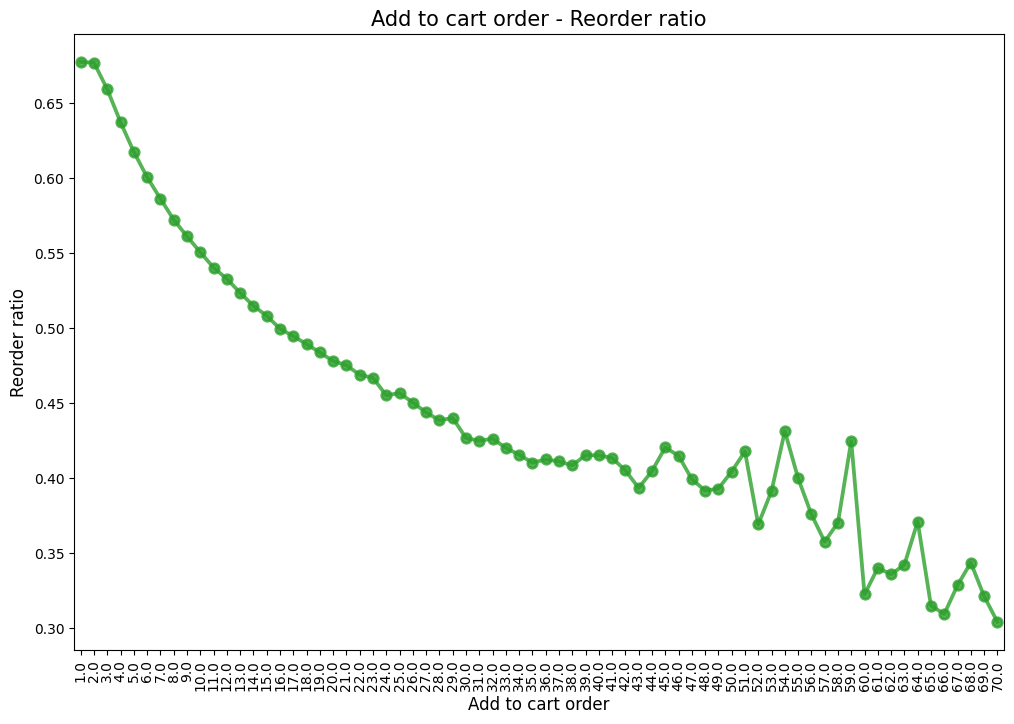

In [34]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]> 70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later.** This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

**Reorder ratio by Time based variables:**

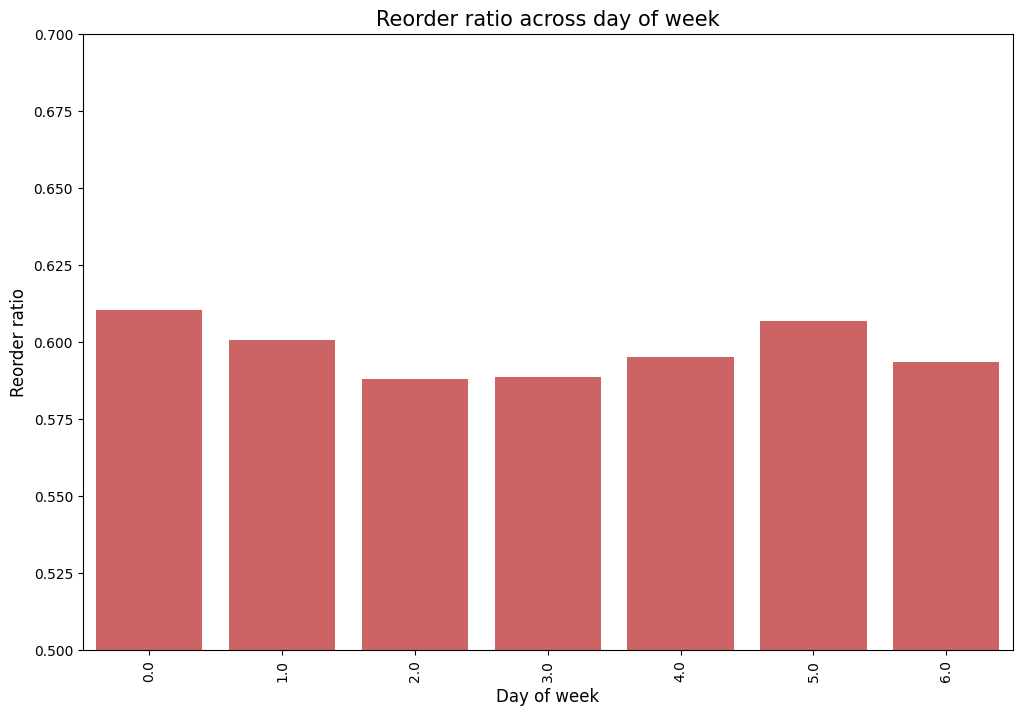

In [37]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

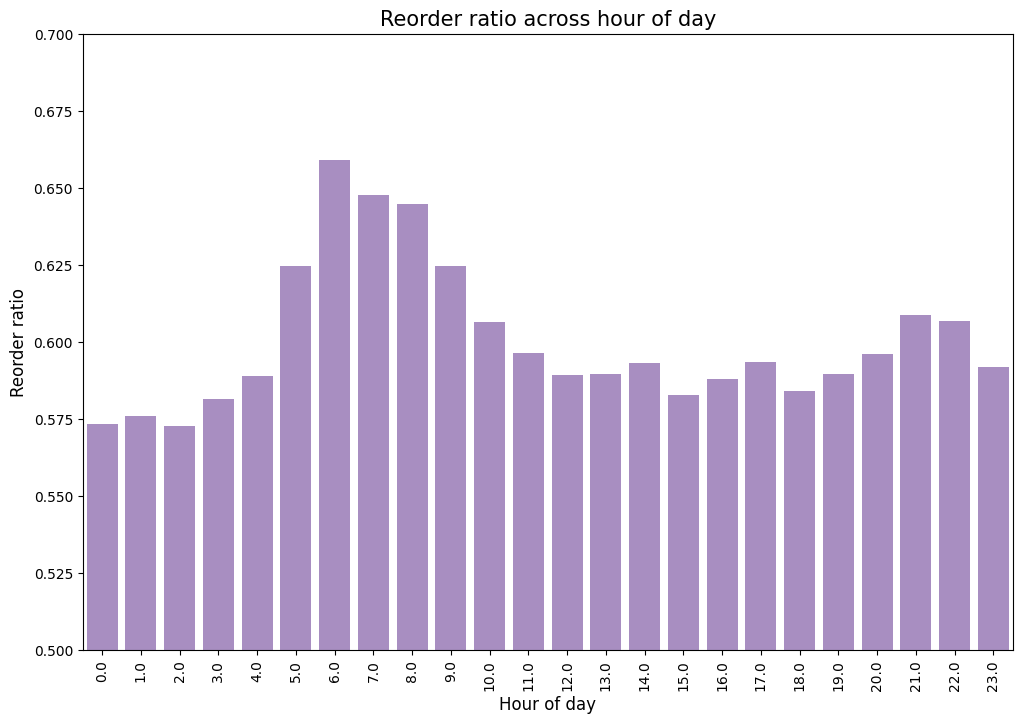

In [39]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

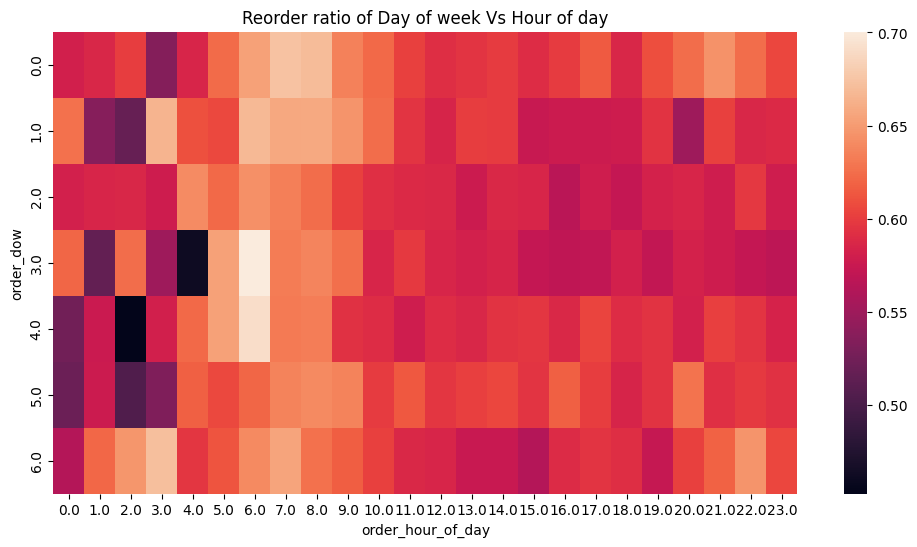

In [43]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot(index='order_dow',columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

#**새로운 전처리/시각화**

주문 규모(상품 개수)와 재주문률 관계를 알아보자.

* x축: 주문당 상품 수 (5~50개 정도 집중, 꼬리 100까지)
* y축: 재주문 비율
* 점 구름:
   
   10개 내외 주문 → 재주문률 높음 (0.6~0.7)
  
   30개 이상 주문 → 재주문률 낮음 (0.4~0.5)

-> 인사이트: 주문 규모가 클수록 새로운 상품 탐색 ↑, 재주문률 ↓.

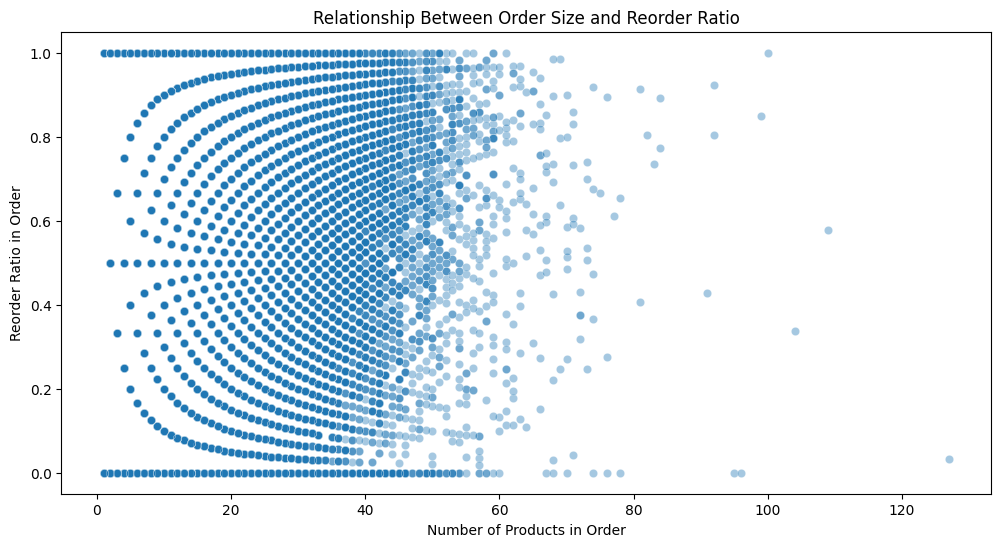

In [44]:
order_stats = order_products_prior_df.groupby("order_id").agg(
    total_items=("product_id","count"),
    reorder_ratio=("reordered","mean")
).reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(x="total_items", y="reorder_ratio", data=order_stats, alpha=0.4)
plt.xlabel("Number of Products in Order")
plt.ylabel("Reorder Ratio in Order")
plt.title("Relationship Between Order Size and Reorder Ratio")
plt.show()